In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.drop(columns='customerID', inplace=True)

In [5]:
df.duplicated().sum()

22

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [9]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [12]:
cols = df.columns
for i in cols:
    print(i, df[i].unique(), '\n')

gender ['Female' 'Male'] 

SeniorCitizen [0 1] 

Partner ['Yes' 'No'] 

Dependents ['No' 'Yes'] 

tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] 

PhoneService ['No' 'Yes'] 

MultipleLines ['No phone service' 'No' 'Yes'] 

InternetService ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity ['No' 'Yes' 'No internet service'] 

OnlineBackup ['Yes' 'No' 'No internet service'] 

DeviceProtection ['No' 'Yes' 'No internet service'] 

TechSupport ['No' 'Yes' 'No internet service'] 

StreamingTV ['No' 'Yes' 'No internet service'] 

StreamingMovies ['No' 'Yes' 'No internet service'] 

Contract ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling ['Yes' 'No'] 

PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7

In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7010.000000,7010.000000,7010.000000,7010.000000
mean,0.162767,32.520399,64.888666,2290.353388
std,0.369180,24.520441,30.064769,2266.820832
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,408.312500
50%,0.000000,29.000000,70.400000,1403.875000
75%,0.000000,56.000000,89.900000,3807.837500
max,1.000000,72.000000,118.750000,8684.800000


#### Exploratory Data Analysis

##### Customer Demographics

Text(0.5, 1.0, 'Dependents')

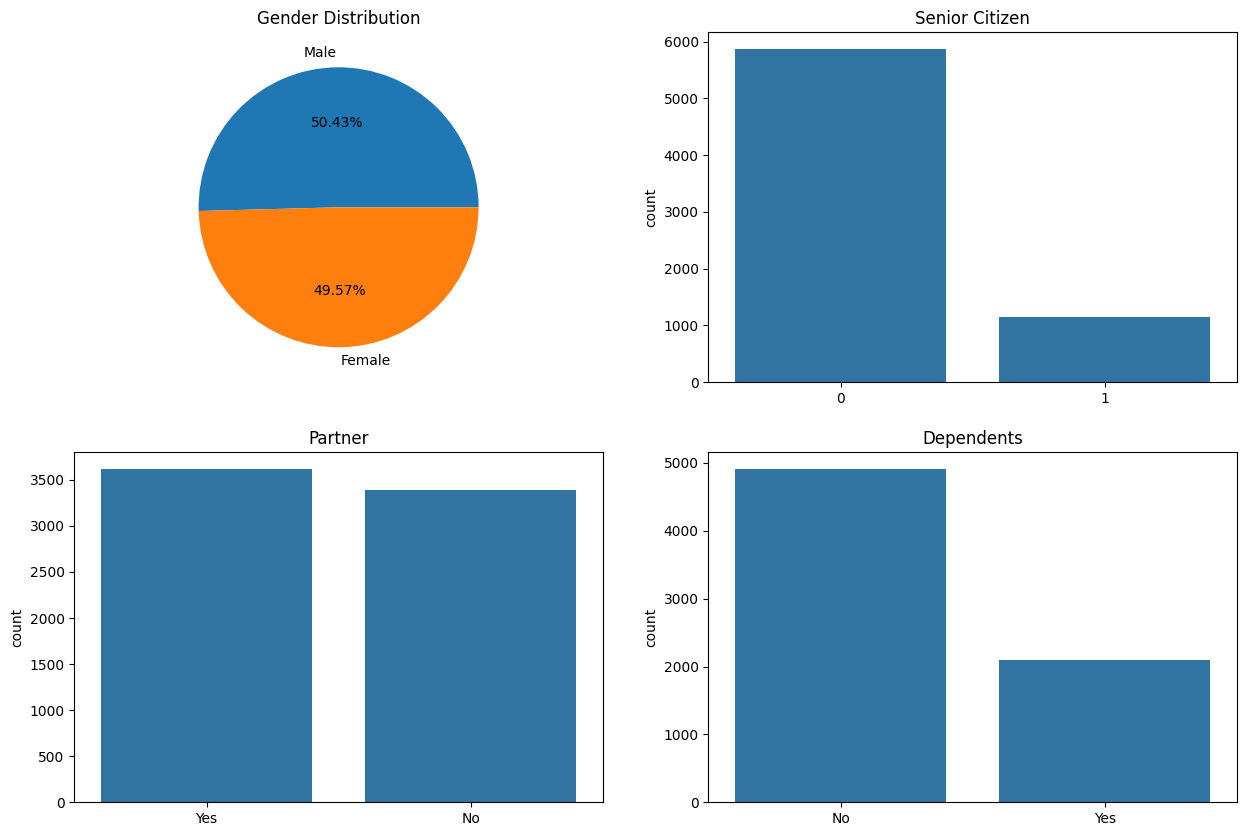

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

ax[0,0].pie(df['gender'].value_counts(),labels  = ['Male', 'Female'], autopct = '%1.2f%%')
ax[0,0].set_title('Gender Distribution')

sns.barplot(y = df['SeniorCitizen'].value_counts(), x = df['SeniorCitizen'].unique(), ax=ax[0,1]).set_title('Senior Citizen')

sns.barplot(y = df['Partner'].value_counts(), x = df['Partner'].unique(), ax=ax[1,0]).set_title('Partner')

sns.barplot(y = df['Dependents'].value_counts(), x = df['Dependents'].unique(), ax=ax[1,1]).set_title('Dependents')

##### Services

Text(0.5, 1.0, 'Streaming Movies')

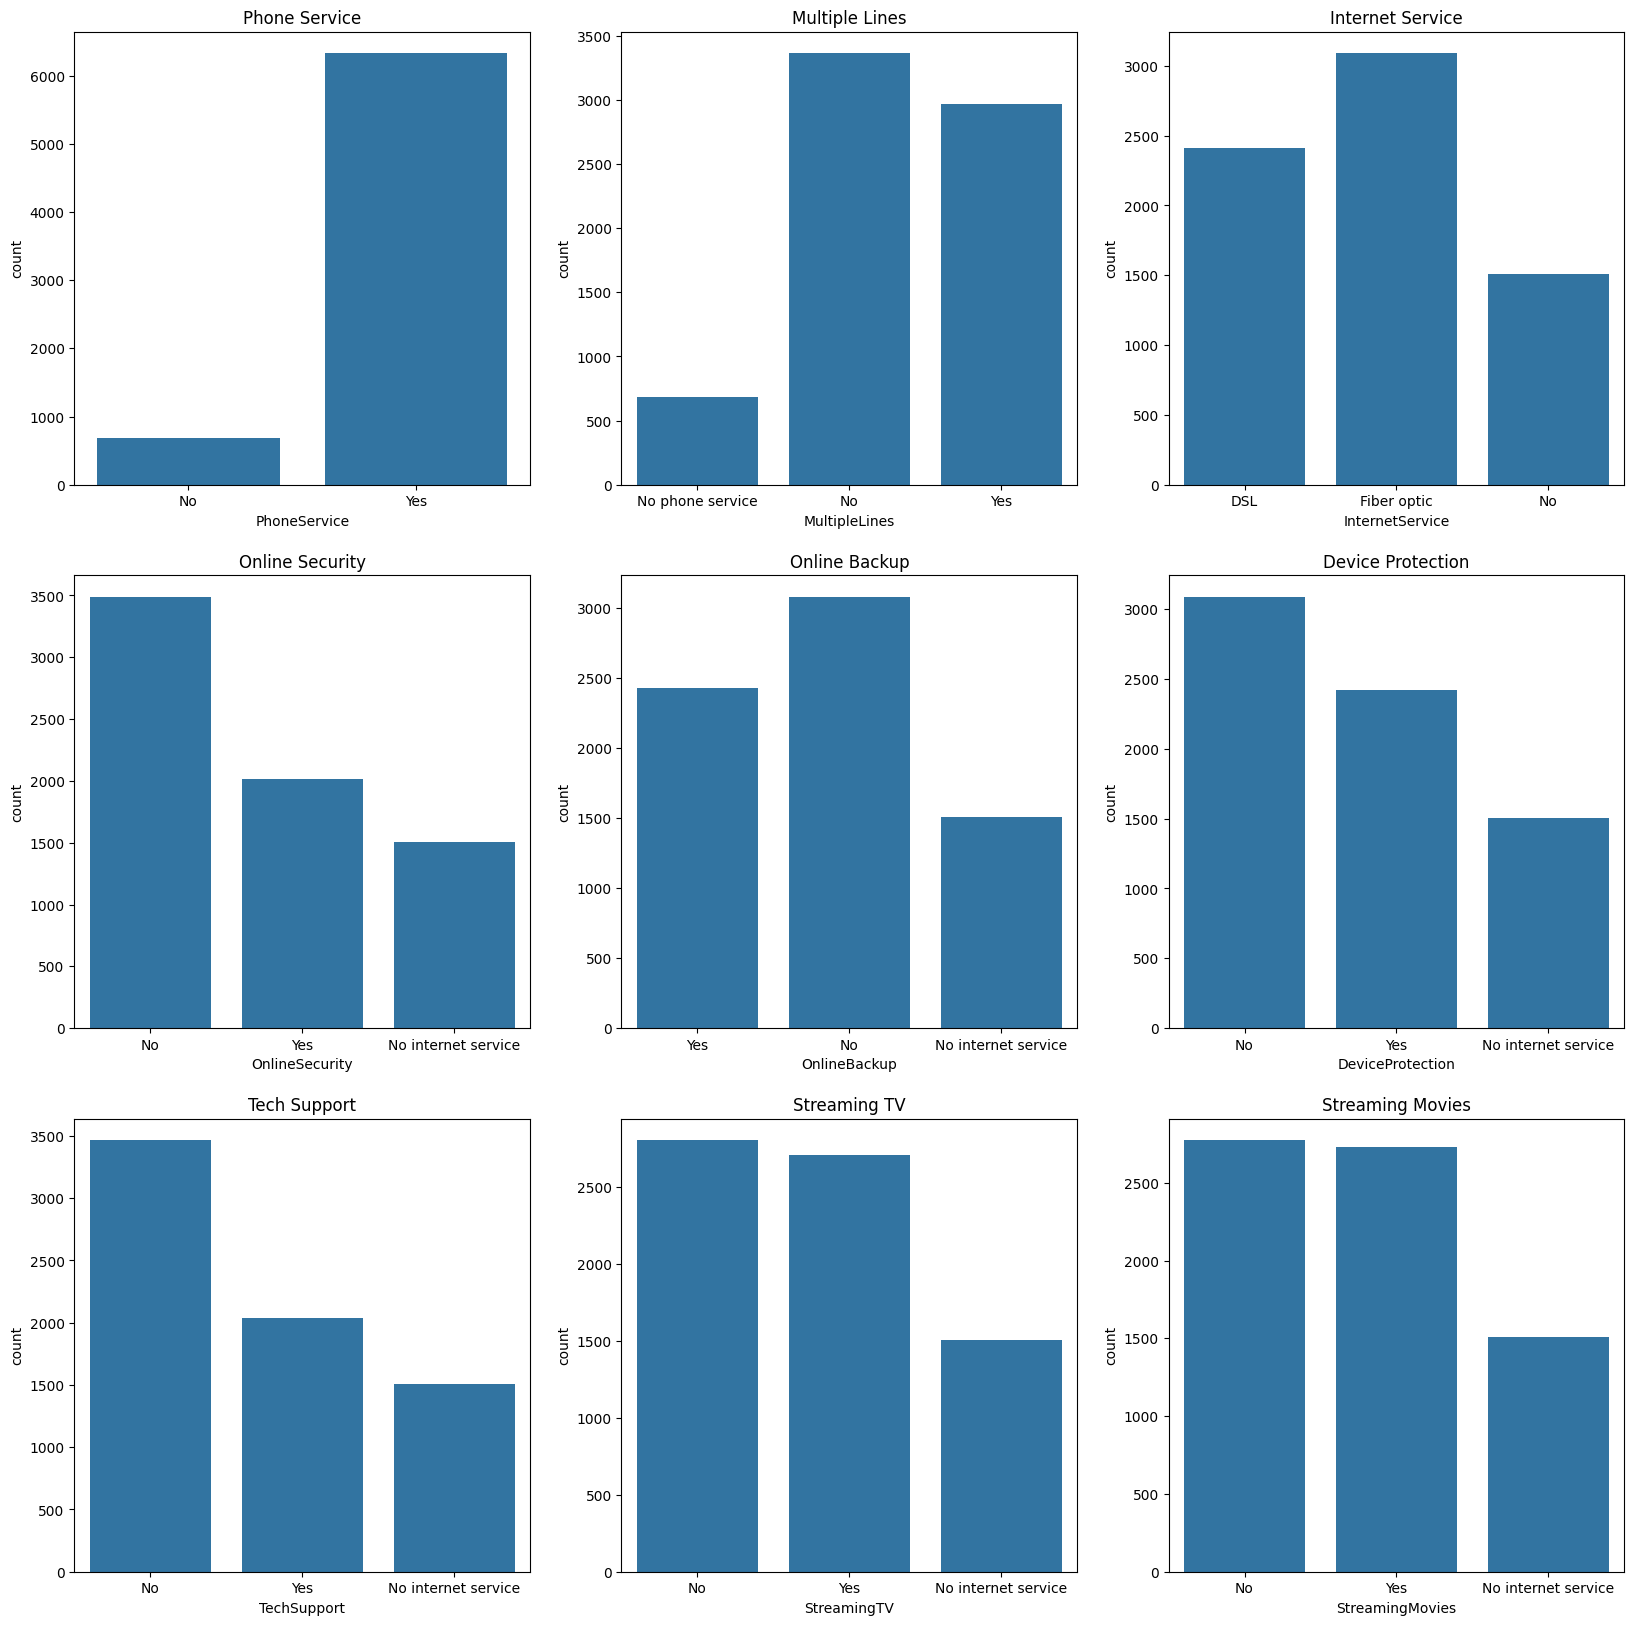

In [15]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20))

sns.countplot(x = df['PhoneService'], ax=ax[0,0]).set_title('Phone Service')
ax[0,0].set_title('Phone Service')

sns.countplot(x = df['MultipleLines'], ax=ax[0,1]).set_title('Multiple Lines')
ax[0,1].set_title('Multiple Lines')

sns.countplot(x = df['InternetService'], ax=ax[0,2]).set_title('Internet Service')
ax[0,2].set_title('Internet Service')

sns.countplot(x = df['OnlineSecurity'], ax=ax[1,0]).set_title('Online Security')
ax[1,0].set_title('Online Security')

sns.countplot(x = df['OnlineBackup'], ax=ax[1,1]).set_title('Online Backup')
ax[1,1].set_title('Online Backup')

sns.countplot(x = df['DeviceProtection'], ax=ax[1,2]).set_title('Device Protection')
ax[1,2].set_title('Device Protection')

sns.countplot(x = df['TechSupport'], ax=ax[2,0]).set_title('Tech Support')
ax[2,0].set_title('Tech Support')

sns.countplot(x = df['StreamingTV'], ax=ax[2,1]).set_title('Streaming TV')
ax[2,1].set_title('Streaming TV')

sns.countplot(x = df['StreamingMovies'], ax=ax[2,2]).set_title('Streaming Movies')
ax[2,2].set_title('Streaming Movies')

##### Tenure and Contract

Text(0.5, 1.0, 'Contract Type')

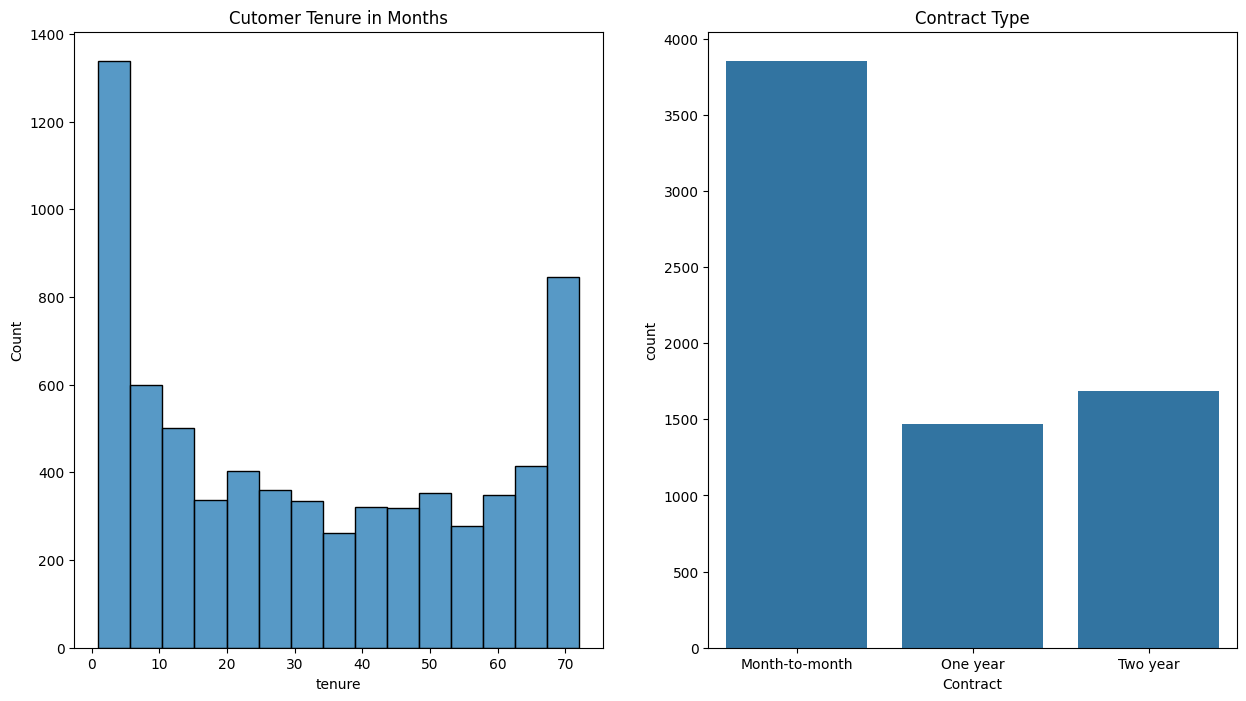

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

sns.histplot(x = 'tenure', data = df, ax= ax[0]).set_title('Cutomer Tenure in Months')

sns.countplot(x = 'Contract', data = df, ax= ax[1]).set_title('Contract Type')

##### Billing and Charges

Text(0.5, 1.0, 'Total Charges')

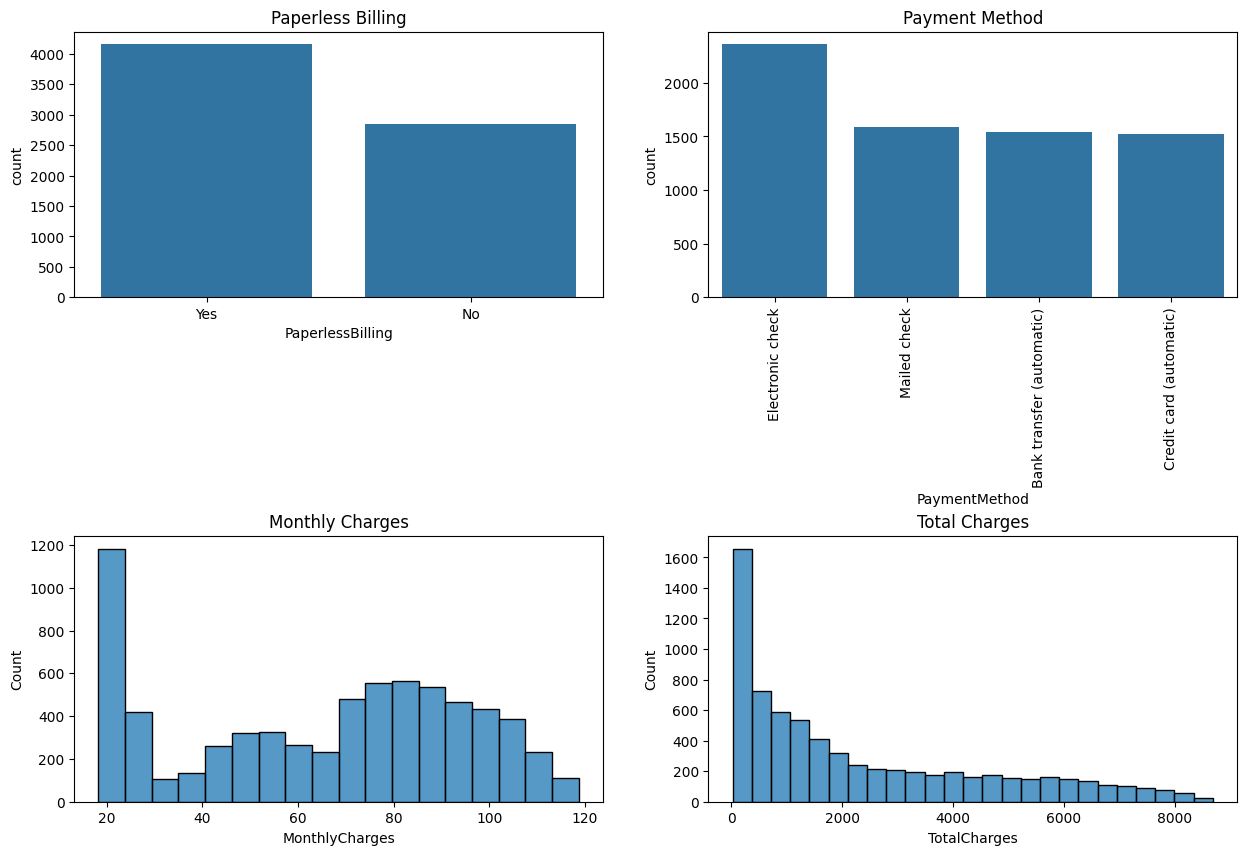

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

fig.subplots_adjust(hspace=0.9)

sns.countplot(x = df['PaperlessBilling'], ax=ax[0,0]).set_title('Paperless Billing')

sns.countplot(x = df['PaymentMethod'], ax=ax[0,1]).set_title('Payment Method')
ax[0,1].xaxis.set_tick_params(rotation=90)

sns.histplot(x = 'MonthlyCharges', data = df, ax = ax[1,0]).set_title('Monthly Charges')

sns.histplot(x = 'TotalCharges', data = df, ax = ax[1,1]).set_title('Total Charges')

##### Churn Count

Text(0.5, 1.0, 'Churn Count')

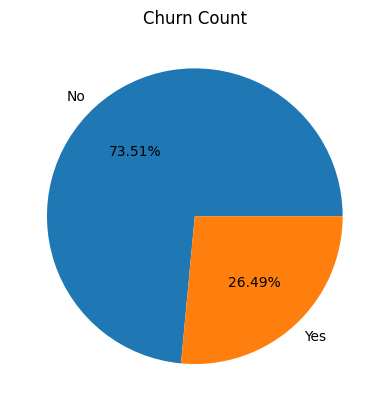

In [18]:
plt.pie(x = df['Churn'].value_counts(), labels = df['Churn'].unique(), autopct = '%1.2f%%')
plt.title('Churn Count')

The target variable is imbalanced

##### Customer Demogrpahics and Churn

Text(0.5, 1.0, 'Dependents and Churn')

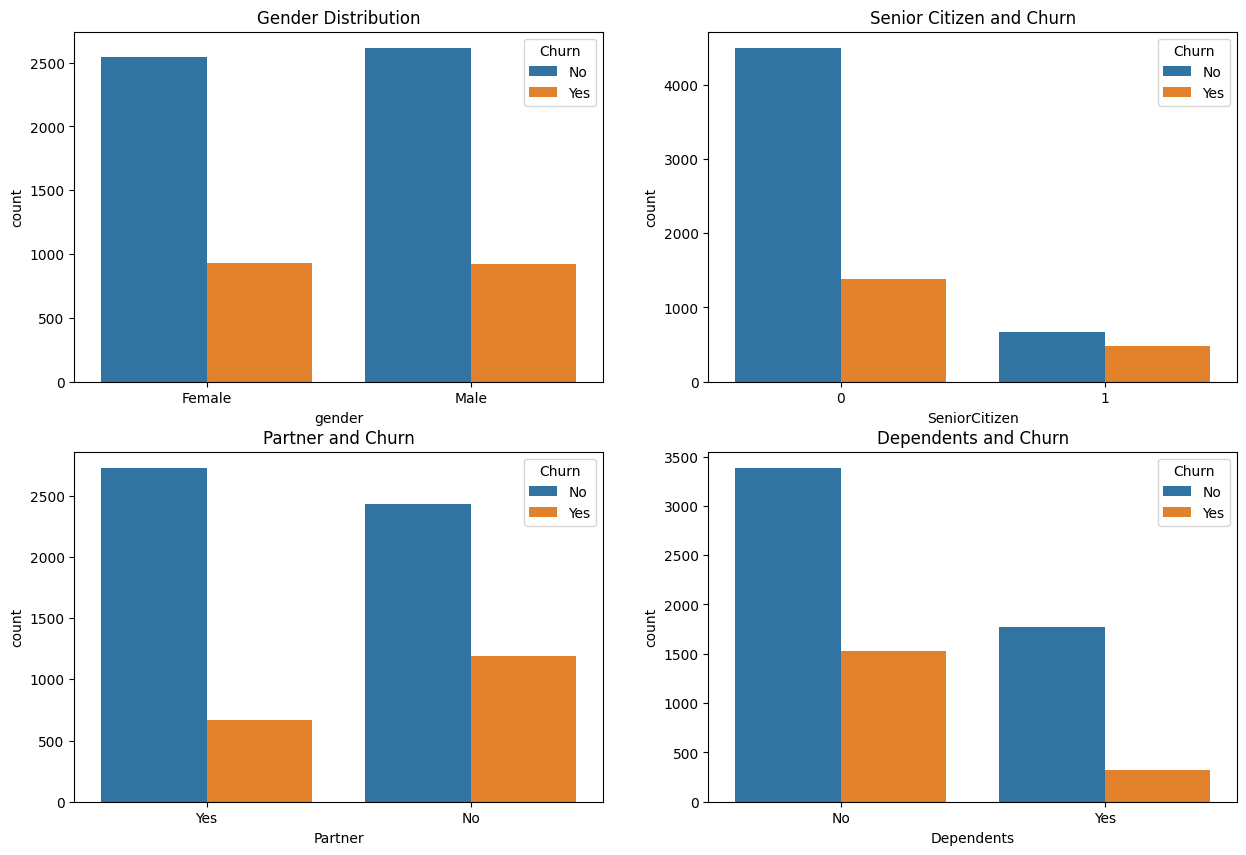

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

sns.countplot(x = 'gender', data = df, hue = 'Churn', ax=ax[0,0])
ax[0,0].set_title('Gender Distribution')

sns.countplot(x = df['SeniorCitizen'], ax=ax[0,1], hue = df['Churn']).set_title('Senior Citizen and Churn')

sns.countplot( x = df['Partner'], ax=ax[1,0], hue = df['Churn']).set_title('Partner and Churn')

sns.countplot(x = df['Dependents'], ax=ax[1,1], hue = df['Churn']).set_title('Dependents and Churn')

##### Services and Churn

Text(0.5, 1.0, 'Streaming Movies')

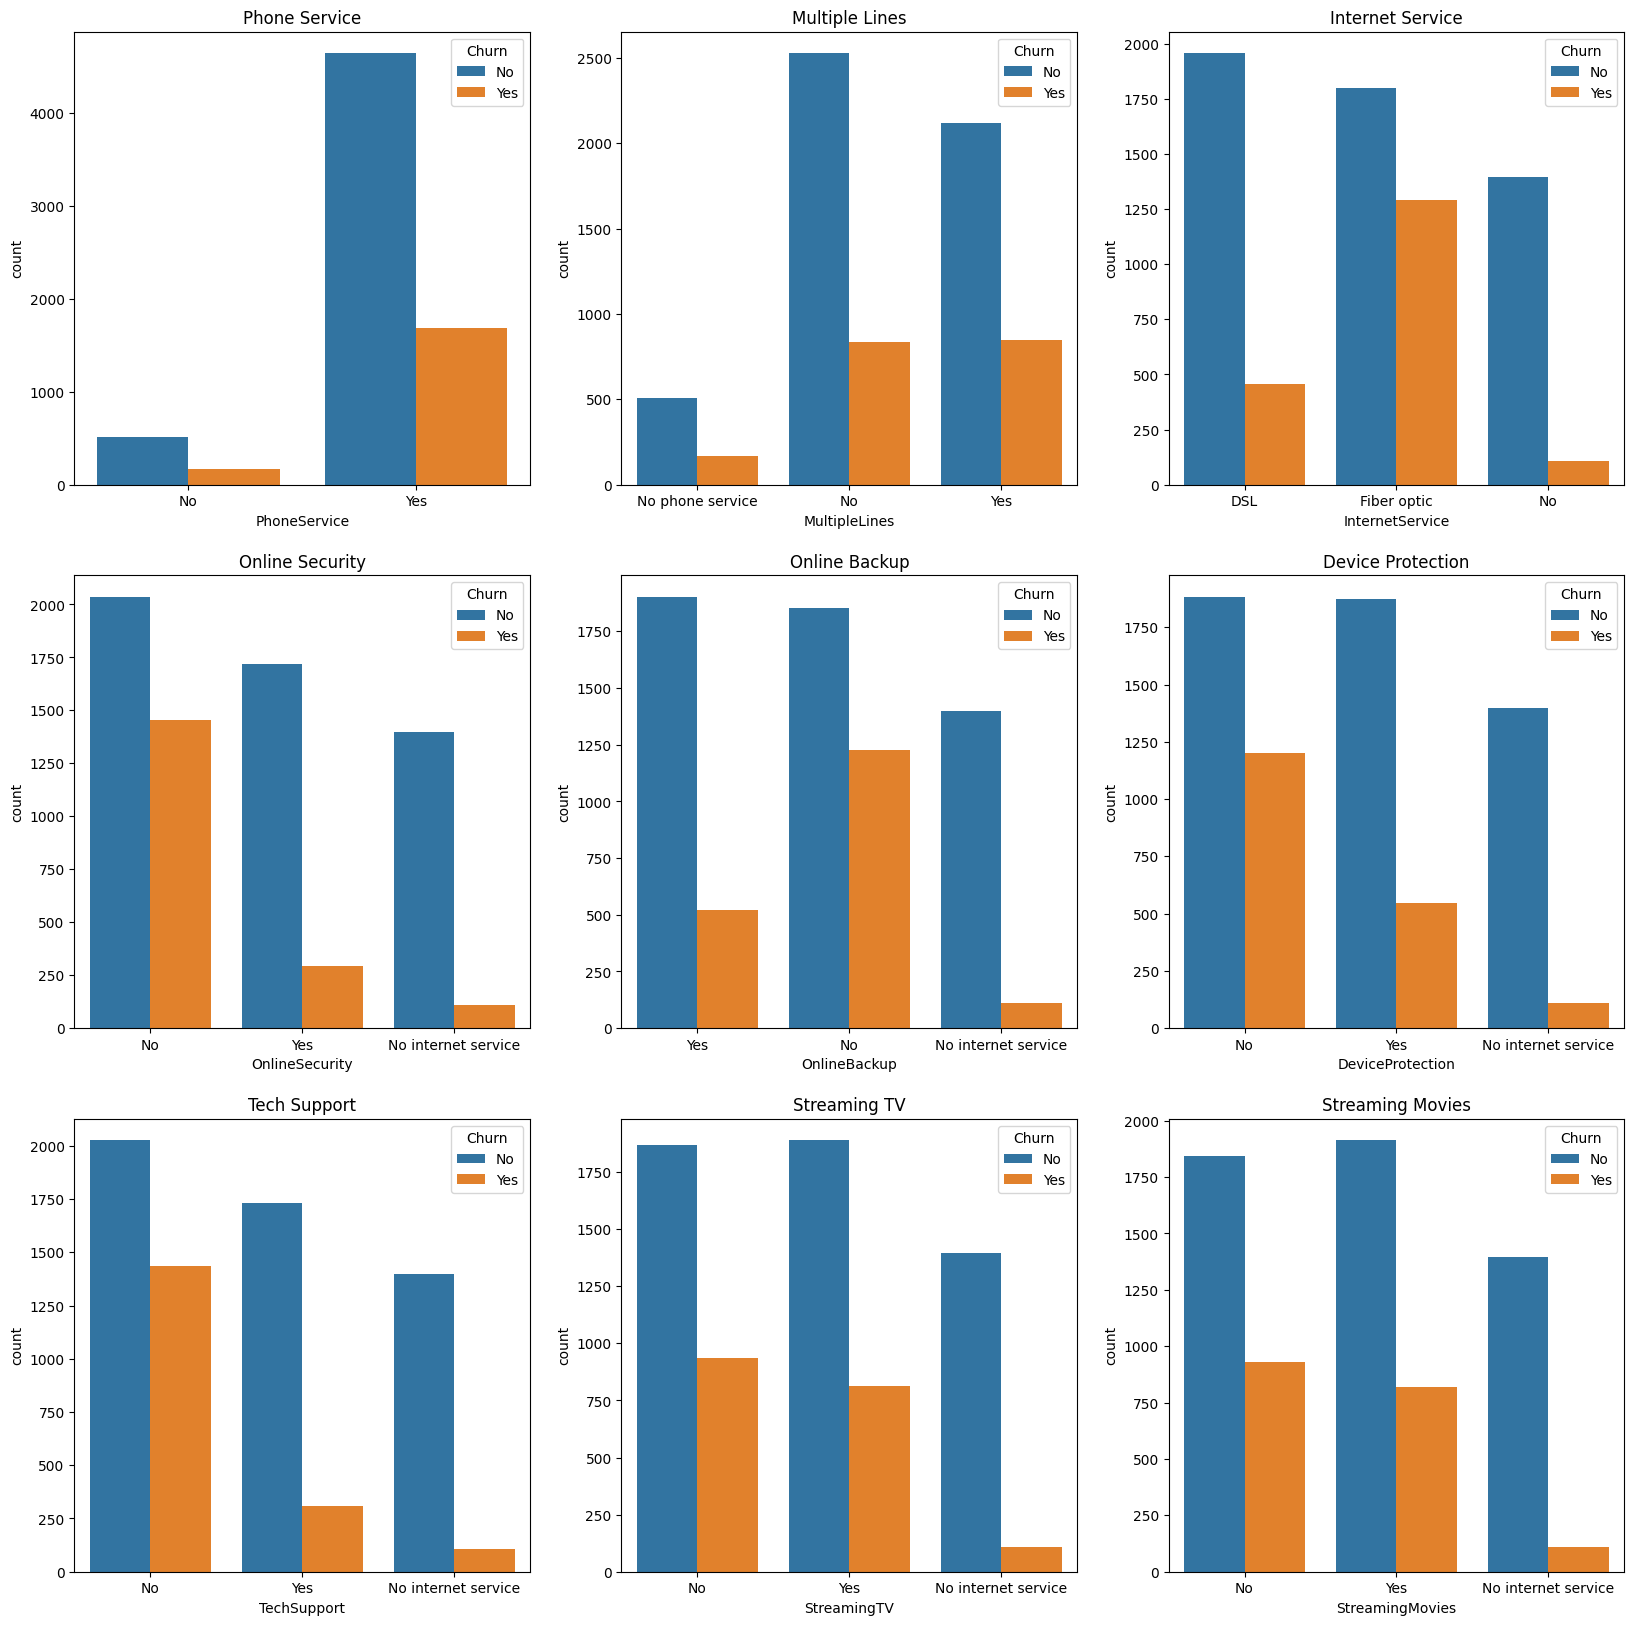

In [20]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20))

sns.countplot(x = df['PhoneService'], ax=ax[0,0], hue = df['Churn']).set_title('Phone Service')
ax[0,0].set_title('Phone Service')

sns.countplot(x = df['MultipleLines'], ax=ax[0,1], hue = df['Churn']).set_title('Multiple Lines')
ax[0,1].set_title('Multiple Lines')

sns.countplot(x = df['InternetService'], ax=ax[0,2], hue = df['Churn']).set_title('Internet Service')
ax[0,2].set_title('Internet Service')

sns.countplot(x = df['OnlineSecurity'], ax=ax[1,0], hue = df['Churn']).set_title('Online Security')
ax[1,0].set_title('Online Security')

sns.countplot(x = df['OnlineBackup'], ax=ax[1,1], hue = df['Churn']).set_title('Online Backup')
ax[1,1].set_title('Online Backup')

sns.countplot(x = df['DeviceProtection'], ax=ax[1,2], hue = df['Churn']).set_title('Device Protection')
ax[1,2].set_title('Device Protection')

sns.countplot(x = df['TechSupport'], ax=ax[2,0], hue = df['Churn']).set_title('Tech Support')
ax[2,0].set_title('Tech Support')

sns.countplot(x = df['StreamingTV'], ax=ax[2,1], hue = df['Churn']).set_title('Streaming TV')
ax[2,1].set_title('Streaming TV')

sns.countplot(x = df['StreamingMovies'], ax=ax[2,2], hue = df['Churn']).set_title('Streaming Movies')
ax[2,2].set_title('Streaming Movies')

##### Tenure/Contract and Churn

Text(0.5, 1.0, 'Contract Type and Churn')

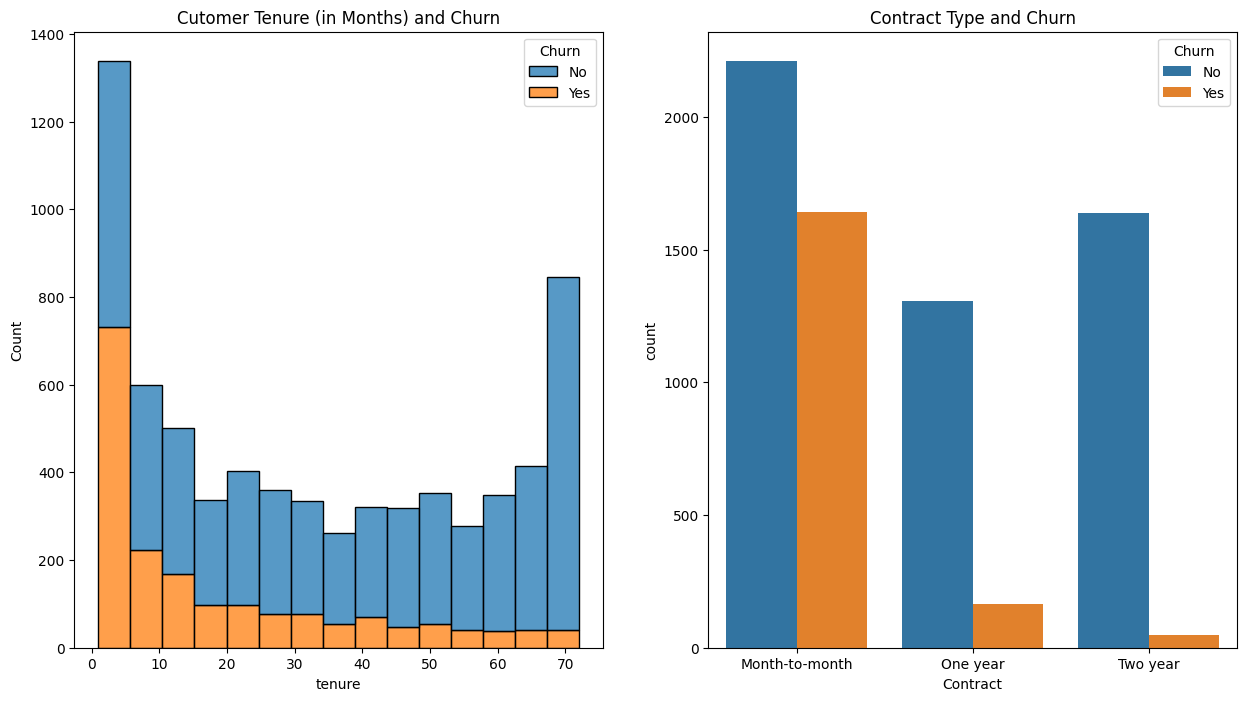

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

sns.histplot(x = 'tenure', data = df, ax= ax[0], hue = 'Churn', multiple = 'stack').set_title('Cutomer Tenure (in Months) and Churn')

sns.countplot(x = 'Contract', data = df, ax= ax[1], hue = 'Churn').set_title('Contract Type and Churn')

##### Billing/Charges and Churn


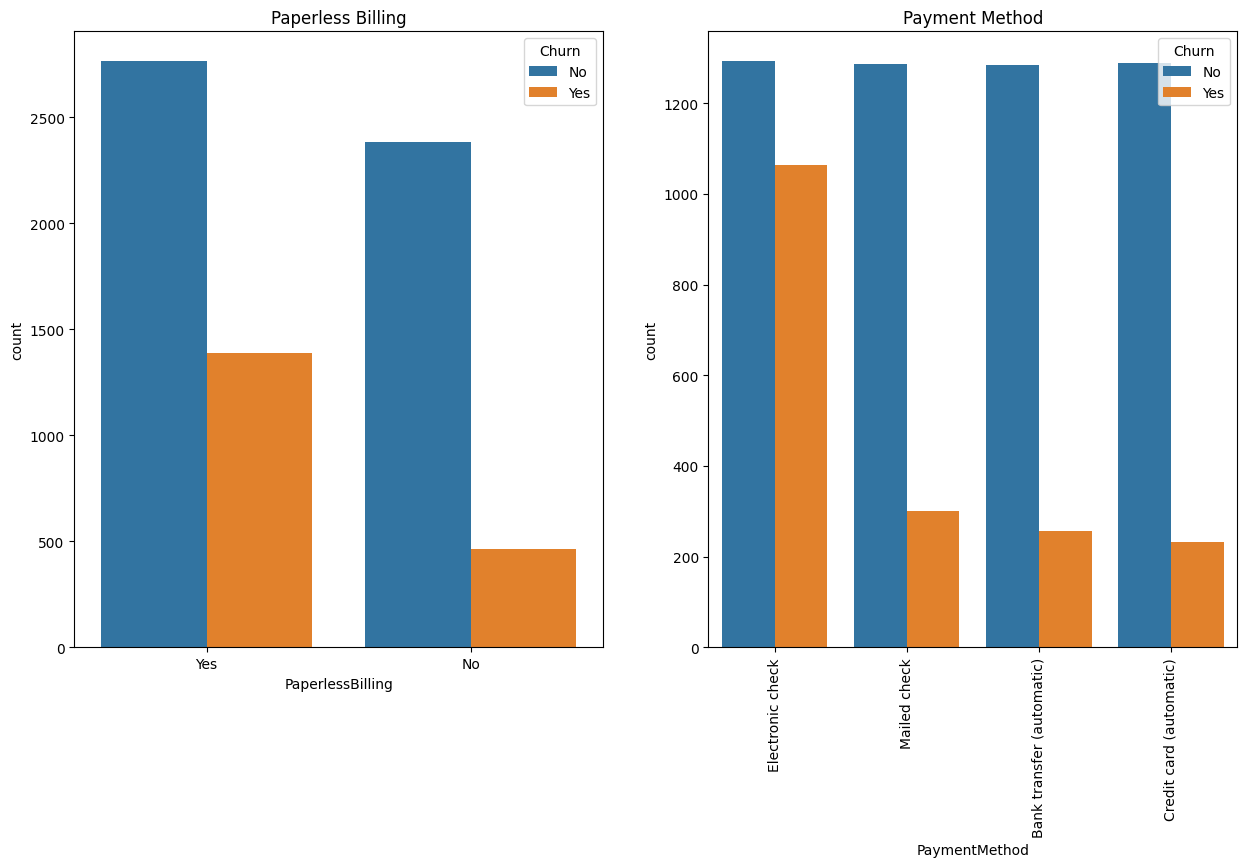

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.countplot(x = df['PaperlessBilling'], ax=ax[0], hue = df['Churn']).set_title('Paperless Billing')

sns.countplot(x = df['PaymentMethod'], ax=ax[1], hue = df['Churn']).set_title('Payment Method')
ax[1].xaxis.set_tick_params(rotation=90)

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

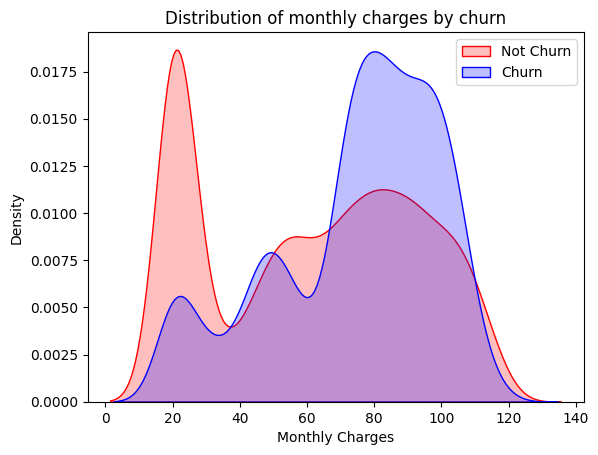

In [23]:
sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No')],
                color="Red", shade = 'Yes')
sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes')],
                 color="Blue", shade= 'Yes')
plt.legend(["Not Churn","Churn"],loc='upper right')
plt.ylabel('Density')
plt.xlabel('Monthly Charges')
plt.title('Distribution of monthly charges by churn')

Text(0.5, 1.0, 'Distribution of total charges by churn')

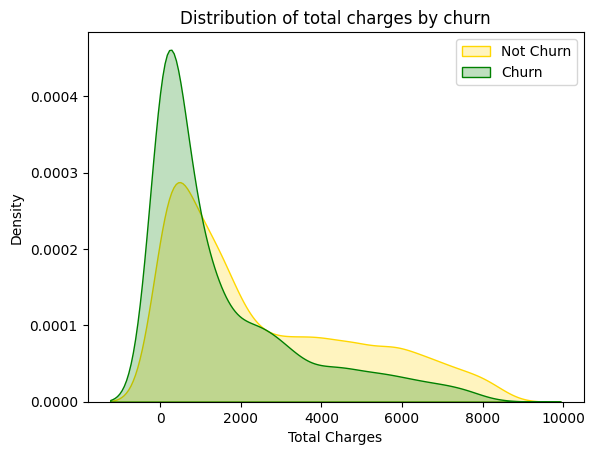

In [24]:
sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No')],
                color="Gold", shade = 'Yes')
sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes')],
                 color="Green", shade= 'Yes')
plt.legend(["Not Churn","Churn"],loc='upper right')
plt.ylabel('Density')
plt.xlabel('Total Charges')
plt.title('Distribution of total charges by churn')

#### Insights:
From the insight gathered from the questions i.e

1.Most fiber optic customers tend to churn the most. 

2.People with shorter tenure (0 to 5 years) tend to churn the most

3.Customers on short term contracts(month to month) churn the most

##### Outlier 

In [25]:
cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
def Outlier_boxplot(df, cols):
    sns.boxplot(x=df[cols])
    plt.show()

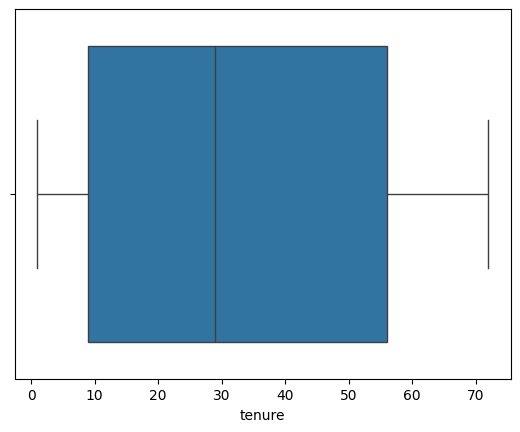

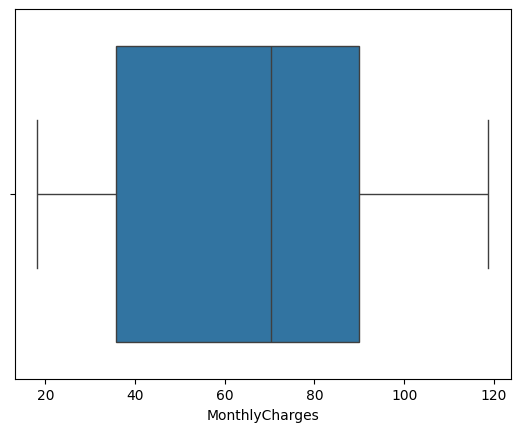

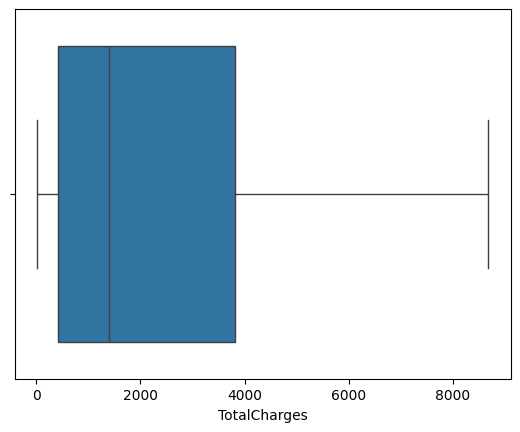

In [26]:
for i in cols:
    Outlier_boxplot(df,i)

#### Label Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder

cols = df.columns[df.dtypes == 'object']
le = LabelEncoder()

for i in cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])

#### Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = sc.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

In [29]:
#df_corr=df.corr()
#plt.figure(figsize=(20, 15))
#sns.heatmap(df_corr[['Churn']].sort_values(by=['Churn'],ascending=False), annot=True)

##### Correlation Heatmap 

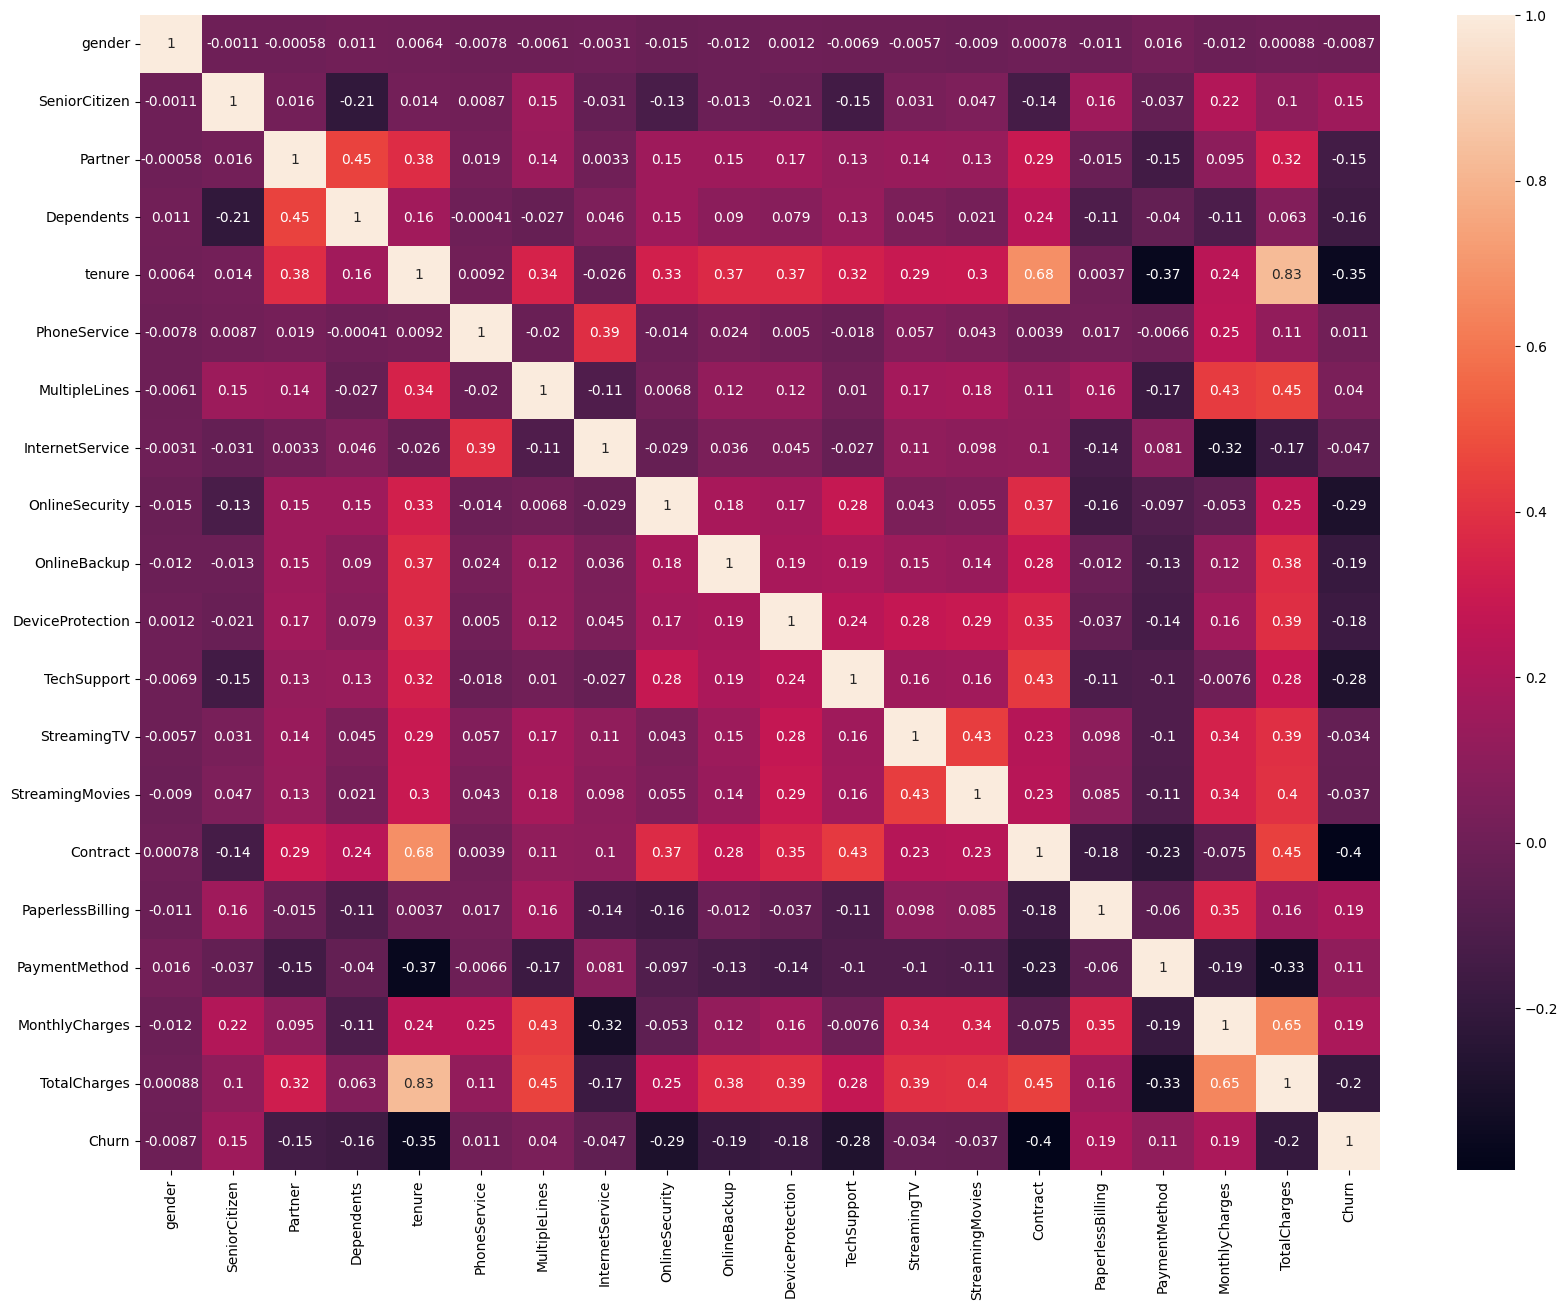

In [33]:
plt.figure(figsize=(20, 15))
fig=sns.heatmap(df.corr(),annot=True)
plt.savefig("out.png")

From the heatmap, we seen that there is very high correlation (0.83) between TotalCharges and tenure, also a fairly strong correlation of 0.65 between TotalCharges and MonthlyCharges.

tenure vs. Churn: The negative correlation coefficient (-0.352634) indicates a moderate negative linear relationship between the two variables. As 'tenure' (the duration a customer has been with the company) increases, the 'Churn' rate (the likelihood of a customer churning) tends to decrease.

MonthlyCharges vs. Churn: The positive correlation coefficient (0.201995) indicates a weak positive linear relationship between the two variables. As 'MonthlyCharges' increase, the 'Churn' rate tends to slightly increase. However, the correlation is not as strong as with 'tenure'.

TotalCharges vs. Churn: The negative correlation (-0.194628) suggests a weak negative linear relationship between the two variables. As 'TotalCharges' (the total amount charged to the customer) increases, the 'Churn' rate tends to slightly decrease. However, similar to 'MonthlyCharges', the correlation is not as strong as with 'tenure'.


In [31]:
from sklearn.model_selection import train_test_split
x = df.drop(['Churn'],axis=1)
y = df['Churn']

In [32]:
(x.shape, y.shape)

((7010, 19), (7010,))

##### Train set Balancing (SMOTE Algorithm)
SMOTE (Synthetic Minority Over-sampling Technique) is a method used to address class imbalance in a binary classification problem.

Earlier we realised that our target vaiable has a class imbalance. One class (the minority class) has significantly fewer instances than the other class (the majority class). This imbalance can negatively impact the performance of machine learning models, as they might become biased toward the majority class.

SMOTE will aim to balance the class distribution by generating synthetic samples until the minority class has the same number of instances as the majority class. By creating synthetic samples, SMOTE helps the model better capture the patterns in the minority class and prevents it from favoring the majority class due to the imbalance.

In [33]:
from imblearn.over_sampling import SMOTE

In [34]:
smote = SMOTE(random_state=42, k_neighbors=5, sampling_strategy='auto')

x_resampled, y_resampled = smote.fit_resample(x, y)

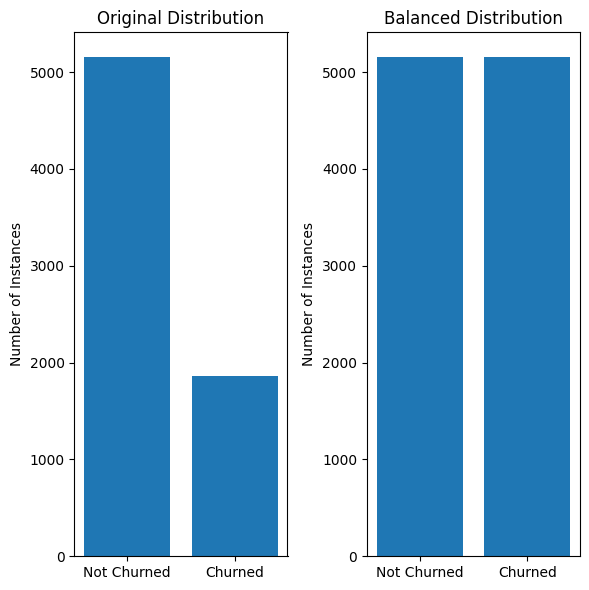

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(6, 6))

# Plot the first bar graph for the original distribution
unique, counts = np.unique(y, return_counts=True)
axes[0].bar(unique, counts)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Not Churned', 'Churned'])
axes[0].set_ylabel('Number of Instances')
axes[0].set_title('Original Distribution')

# Plot the second bar graph for a separate y value
unique2, counts2 = np.unique(y_resampled, return_counts=True) 
axes[1].bar(unique2, counts2)
axes[1].set_xticks([0, 1])  # Adjust as needed
axes[1].set_xticklabels(['Not Churned', 'Churned'])  # Adjust labels
axes[1].set_ylabel('Number of Instances')
axes[1].set_title('Balanced Distribution')

# Adjust spacing between subplots
plt.tight_layout()

# Display the subplots
plt.show()

##### Train Test Split

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test =train_test_split(x_resampled, y_resampled, train_size=0.8, random_state=42)

In [38]:
x_train.shape, y_train.shape

((8244, 19), (8244,))

In [39]:
x_test.shape, y_test.shape

((2062, 19), (2062,))

In [40]:
y_test.value_counts()

Churn
0    1036
1    1026
Name: count, dtype: int64

#### ML Model

In [42]:
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import sklearn.metrics as metrics

##### KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [45]:
y_pred_knn =knn.predict(x_test)

In [46]:
print(f"Training Score : {knn.score(x_train,y_train)}")
print(f"Testing Score : {knn.score(x_test,y_test)}")

Training Score : 0.8569868995633187
Testing Score : 0.7958292919495635


In [47]:
print("Accuracy:", accuracy_score(y_test,y_pred_knn))

Accuracy: 0.7958292919495635


In [48]:
print("", metrics.classification_report(y_test,y_pred_knn))

               precision    recall  f1-score   support

           0       0.86      0.71      0.78      1036
           1       0.75      0.88      0.81      1026

    accuracy                           0.80      2062
   macro avg       0.80      0.80      0.79      2062
weighted avg       0.81      0.80      0.79      2062



Hyperparamter Tuning

In [49]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
kf=KFold(n_splits=5,shuffle=True,random_state=42)
parameter={'n_neighbors': np.arange(2, 30, 1), 
           'weights': ['uniform', 'distance'],
           'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

knn_cv=GridSearchCV(knn, param_grid=parameter, cv=kf, verbose=1,scoring='accuracy')
knn_cv.fit(x_train, y_train)
print(knn_cv.best_params_)

Fitting 5 folds for each of 224 candidates, totalling 1120 fits
{'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'distance'}


In [50]:
knn_tuned=KNeighborsClassifier(algorithm='auto', n_neighbors= 4, weights='distance')

In [51]:
knn_tuned.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [52]:
y_pred_knn1 =knn_tuned.predict(x_test)

In [53]:
print("Accuracy:", accuracy_score(y_test,y_pred_knn1))

Accuracy: 0.8166828322017459


In [171]:
print("", metrics.classification_report(y_test,y_pred_knn1))

               precision    recall  f1-score   support

           0       0.87      0.75      0.80      1036
           1       0.78      0.89      0.83      1026

    accuracy                           0.82      2062
   macro avg       0.82      0.82      0.82      2062
weighted avg       0.82      0.82      0.82      2062



In [55]:
confusion_matrix(y_test, y_pred_knn)

array([[736, 300],
       [121, 905]], dtype=int64)

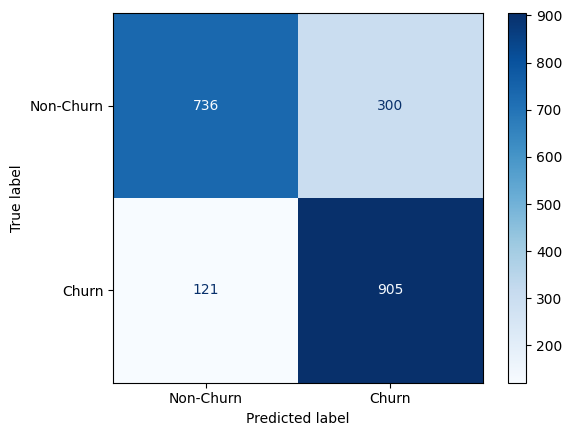

In [56]:
conf_matrix = confusion_matrix(y_test, y_pred_knn)

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Non-Churn', 'Churn'])
disp.plot(cmap='Blues', values_format='d')
plt.show()

# 

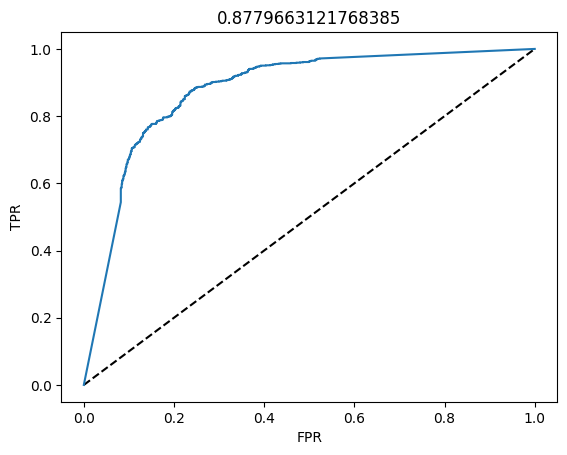

In [199]:
probab_knn = knn_tuned.predict_proba(x_test)[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, probab_knn)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title(metrics.roc_auc_score(y_test, probab_knn))
plt.show()

##### Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [59]:
y_pred_log=log.predict(x_test)

In [60]:
print(f"Training Score : {log.score(x_train,y_train)}")
print(f"Testing Score : {log.score(x_test,y_test)}")

Training Score : 0.7812954876273653
Testing Score : 0.7851600387972842


In [61]:
print("Accuracy:", accuracy_score(y_test,y_pred_log))

Accuracy: 0.7851600387972842


Hyperparamter Tuning

In [62]:
logistic_regression_params = {
    'penalty': ['L1', 'L2','elasticnet','none'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga','netwon-c']
}

In [63]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
kf=KFold(n_splits=5,shuffle=True,random_state=42)


log_cv=GridSearchCV(log, param_grid=logistic_regression_params, cv=kf, verbose=1,scoring='accuracy')
log_cv.fit(x_train, y_train)
print(log_cv.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'C': 0.1, 'penalty': 'none', 'solver': 'saga'}


In [64]:
log_tunned=LogisticRegression(C=0.1,penalty='none', solver='saga')

In [65]:
log_tunned.fit(x_train,y_train)

LogisticRegression(C=0.1, penalty='none', solver='saga')

In [66]:
y_pred_log1=log_tunned.predict(x_test)

In [67]:
print("Accuracy:", accuracy_score(y_test,y_pred_log1))

Accuracy: 0.7856450048496605


In [68]:
print("", metrics.classification_report(y_test,y_pred_log1))

               precision    recall  f1-score   support

           0       0.82      0.74      0.78      1036
           1       0.76      0.83      0.79      1026

    accuracy                           0.79      2062
   macro avg       0.79      0.79      0.79      2062
weighted avg       0.79      0.79      0.79      2062



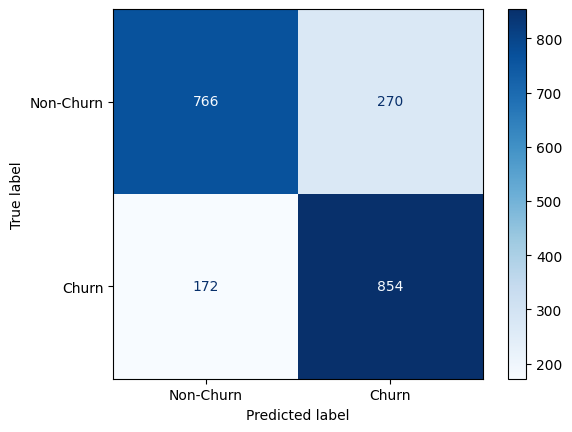

In [173]:
conf_matrix_log = confusion_matrix(y_test, y_pred_log1)

disp = ConfusionMatrixDisplay(conf_matrix_log, display_labels=['Non-Churn', 'Churn'])
disp.plot(cmap='Blues', values_format='d')
plt.show()

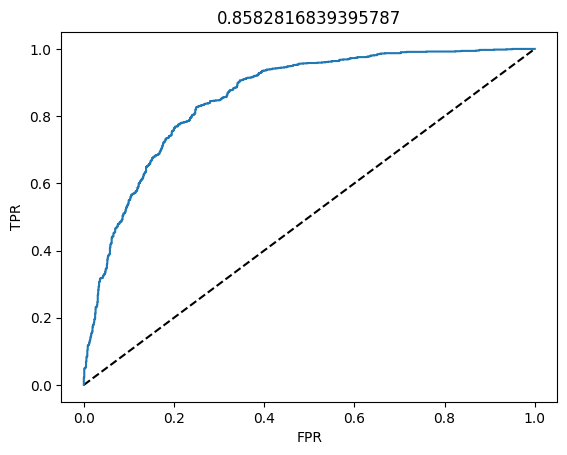

In [181]:
probab_log = log_tunned.predict_proba(x_test)[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, probab_log)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title(metrics.roc_auc_score(y_test, probab_log))
plt.show()

#####  Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
dtree  = DecisionTreeClassifier()

In [72]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [73]:
y_pred_dtree=dtree.predict(x_test)

In [74]:
print(f"Training Score : {dtree.score(x_train,y_train)}")
print(f"Testing Score : {dtree.score(x_test,y_test)}")

Training Score : 0.9989082969432315
Testing Score : 0.7677012609117362


In [75]:
print("Accuracy:", accuracy_score(y_test,y_pred_dtree))

Accuracy: 0.7677012609117362


Hyperparamter Tuning

In [76]:
dtree_param_grid = {
    'max_depth': [2,4,6,8,10],
    'min_samples_leaf': [2,4,6,8,10],
    'min_samples_split': [2,4,6,8,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
kf=KFold(n_splits=5,shuffle=True,random_state=42)


dtree_cv=GridSearchCV(dtree, param_grid=dtree_param_grid, cv=kf, verbose=1,scoring='accuracy')
dtree_cv.fit(x_train, y_train)
print(dtree_cv.best_params_)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 6, 'random_state': 42}


In [77]:
dtree_tuned= DecisionTreeClassifier(criterion='gini', max_depth=8, min_samples_leaf=2, min_samples_split=6, random_state=42)

In [78]:
dtree_tuned.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=6,
                       random_state=42)

In [79]:
y_pred_dtree1 = dtree_tuned.predict(x_test)

In [80]:
print("Accuracy:", accuracy_score(y_test,y_pred_dtree1))

Accuracy: 0.7963142580019399


In [81]:
print("", metrics.classification_report(y_test,y_pred_dtree1))

               precision    recall  f1-score   support

           0       0.85      0.72      0.78      1036
           1       0.76      0.87      0.81      1026

    accuracy                           0.80      2062
   macro avg       0.80      0.80      0.80      2062
weighted avg       0.80      0.80      0.80      2062



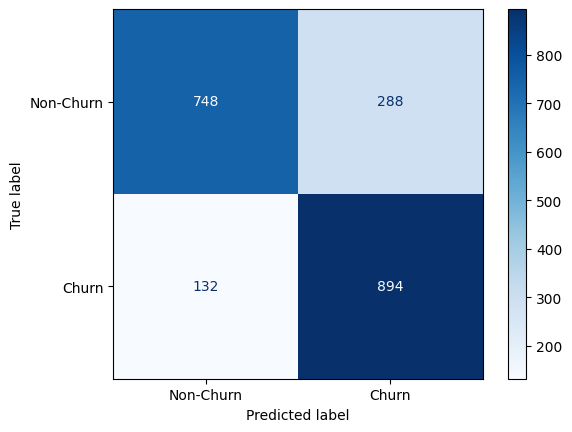

In [82]:
conf_matrix_dtree= confusion_matrix(y_test, y_pred_dtree1)

disp = ConfusionMatrixDisplay(conf_matrix_dtree, display_labels=['Non-Churn', 'Churn'])
disp.plot(cmap='Blues', values_format='d')
plt.show()

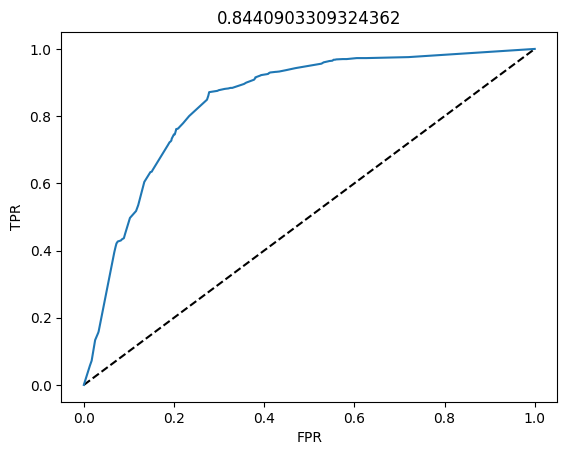

In [182]:
probab_dtree = dtree_tuned.predict_proba(x_test)[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, probab_dtree)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title(metrics.roc_auc_score(y_test, probab_dtree))
plt.show()

#####  Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
rfc = RandomForestClassifier()

In [85]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [86]:
y_pred_rfc=rfc.predict(x_test)

In [87]:
print(f"Training Score : {rfc.score(x_train,y_train)}")
print(f"Testing Score : {rfc.score(x_test,y_test)}")

Training Score : 0.9989082969432315
Testing Score : 0.8326867119301649


In [88]:
print("Accuracy:", accuracy_score(y_test,y_pred_rfc))

Accuracy: 0.8326867119301649


Hyperparameter tuning

In [92]:
from sklearn.model_selection import RandomizedSearchCV
rfc_param_grid = {
    'max_depth': [2,4,6,8,10],
    'min_samples_leaf': [2,4,6,8,10],
    'min_samples_split': [2,4,6,8,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
kf=KFold(n_splits=5,shuffle=True,random_state=42)


rfc_cv=RandomizedSearchCV(rfc, param_distributions=rfc_param_grid, cv=kf, verbose=1,scoring='accuracy')
rfc_cv.fit(x_train, y_train)
print(rfc_cv.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'random_state': 42, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_depth': 10, 'criterion': 'entropy'}


In [93]:
rfc_tuned= RandomForestClassifier(criterion='entropy',min_samples_leaf=4,max_depth=10,min_samples_split=4,random_state=42)

In [94]:
rfc_tuned.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       min_samples_split=4, random_state=42)

In [98]:
y_pred_rfc1 = rfc_tuned.predict(x_test)

In [99]:
print("Accuracy:", accuracy_score(y_test,y_pred_rfc1))

Accuracy: 0.8191076624636275


In [100]:
print("", metrics.classification_report(y_test,y_pred_rfc1))

               precision    recall  f1-score   support

           0       0.85      0.77      0.81      1036
           1       0.79      0.87      0.83      1026

    accuracy                           0.82      2062
   macro avg       0.82      0.82      0.82      2062
weighted avg       0.82      0.82      0.82      2062



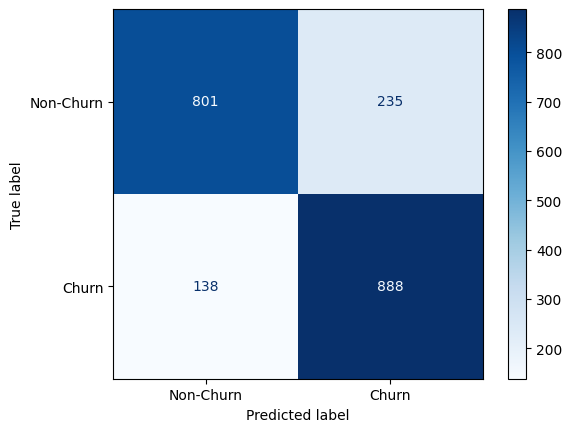

In [101]:
conf_matrix_rfc= confusion_matrix(y_test, y_pred_rfc1)

disp = ConfusionMatrixDisplay(conf_matrix_rfc, display_labels=['Non-Churn', 'Churn'])
disp.plot(cmap='Blues', values_format='d')
plt.show()

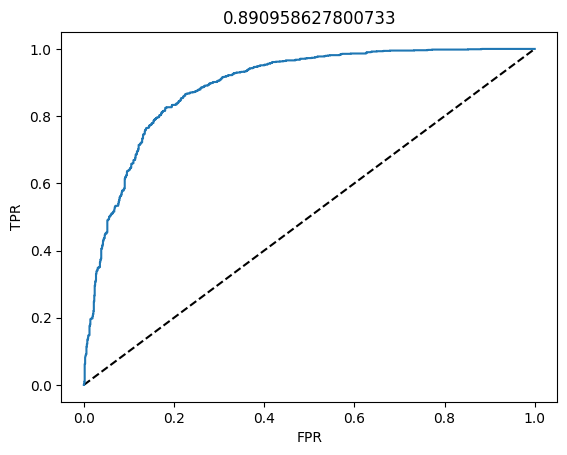

In [183]:
probab_rfc = rfc_tuned.predict_proba(x_test)[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, probab_rfc)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title(metrics.roc_auc_score(y_test, probab_rfc))
plt.show()

In [200]:
results_tuned_df=pd.DataFrame(columns=['Model','Accuracy','Precision','Recall','F1-Score','AUC-ROC'])

In [201]:
#model evalution
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

In [202]:
# Calculate Evalution Metrics

accuracy_knn=accuracy_score(y_test,y_pred_knn1)
precision_knn=precision_score(y_test,y_pred_knn1)
recall_knn=recall_score(y_test,y_pred_knn1)
f1_knn=f1_score(y_test,y_pred_knn1)
auc_roc_knn=roc_auc_score(y_test,probab_knn)


accuracy_log=accuracy_score(y_test,y_pred_log1)
precision_log=precision_score(y_test,y_pred_log1)
recall_log=recall_score(y_test,y_pred_log1)
f1_log=f1_score(y_test,y_pred_log1)
auc_roc_log=roc_auc_score(y_test,probab_log)

accuracy_dtree=accuracy_score(y_test,y_pred_dtree1)
precision_dtree=precision_score(y_test,y_pred_dtree1)
recall_dtree=recall_score(y_test,y_pred_dtree1)
f1_dtree=f1_score(y_test,y_pred_dtree1)
auc_roc_dtree=roc_auc_score(y_test,probab_dtree)

accuracy_rfc=accuracy_score(y_test,y_pred_rfc1)
precision_rfc=precision_score(y_test,y_pred_rfc1)
recall_rfc=recall_score(y_test,y_pred_rfc1)
f1_rfc=f1_score(y_test,y_pred_rfc1)
auc_roc_rfc=roc_auc_score(y_test,probab_rfc)

In [203]:
results_tuned_df = pd.concat([results_tuned_df, pd.DataFrame([{'Model': 'KNN',
                         'Accuracy':accuracy_knn,
                                         'Precision':precision_knn,
                                         'Recall':recall_knn,
                                         'F1-Score':f1_knn,
                                         'AUC-ROC':auc_roc_knn}])], ignore_index=True)

results_tuned_df = pd.concat([results_tuned_df, pd.DataFrame([{'Model': 'Logistic',
                         'Accuracy':accuracy_log,
                                         'Precision':precision_log,
                                         'Recall':recall_log,
                                         'F1-Score':f1_log,
                                         'AUC-ROC':auc_roc_log}])], ignore_index=True)


results_tuned_df = pd.concat([results_tuned_df, pd.DataFrame([{'Model': 'Decision Tree',
                         'Accuracy':accuracy_dtree,
                                         'Precision':precision_dtree,
                                         'Recall':recall_dtree,
                                         'F1-Score':f1_dtree,
                                         'AUC-ROC':auc_roc_dtree}])], ignore_index=True)

results_tuned_df = pd.concat([results_tuned_df, pd.DataFrame([{'Model': 'Random Forest',
                         'Accuracy':accuracy_rfc,
                                         'Precision':precision_rfc,
                                         'Recall':recall_rfc,
                                         'F1-Score':f1_rfc,
                                         'AUC-ROC':auc_roc_rfc}])], ignore_index=True)

In [204]:
results_tuned_df

,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,KNN,0.816683,0.776923,0.885965,0.827869,0.877966
1,Logistic,0.785645,0.759786,0.832359,0.794419,0.858282
2,Decision Tree,0.796314,0.756345,0.871345,0.809783,0.844090
3,Random Forest,0.819108,0.790739,0.865497,0.826431,0.890959


In [205]:
import pickle
pickle.dump(rfc_tuned,open('model1.pkl','wb'))